# SCADA Anomaly Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_with_attacks = pd.read_csv('data/GHL/01_Lev_fault_Temp_corr_seed_11_vars_23.csv')

## Cleaning Data

* Fixing column names
* Reading Time as datetime

In [3]:
cols = list(data_with_attacks.columns)
cols.append(cols.pop(cols.index('ATTACK')))

In [4]:
data_with_attacks = data_with_attacks.loc[:,cols]

In [5]:
data = data_with_attacks[data_with_attacks.ATTACK == 0]

In [6]:
data.head(2)

,Time,RT_level_ini,DANGER,FAULT,RT_temperature.T,C_temperature.T,RT_level,out_valve_act,dT_rand,inv_valve_act,...,boundary.m_flow_in,dir_valve_act,dt_rand,C_level,HT_temperature.T,heater_act,HT_level,limiter1.y,dL_rand,ATTACK
0,0.0,0.0,0.0,0.0,283.149994,273.149994,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,283.149994,0.0,0.1,100.0,0.0,0.0
1,1.0,0.0,0.0,0.0,283.149994,273.149994,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,283.163330,0.0,0.1,100.0,0.0,0.0


In [7]:
data_with_attacks.head(2)

,Time,RT_level_ini,DANGER,FAULT,RT_temperature.T,C_temperature.T,RT_level,out_valve_act,dT_rand,inv_valve_act,...,boundary.m_flow_in,dir_valve_act,dt_rand,C_level,HT_temperature.T,heater_act,HT_level,limiter1.y,dL_rand,ATTACK
0,0.0,0.0,0.0,0.0,283.149994,273.149994,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,283.149994,0.0,0.1,100.0,0.0,0.0
1,1.0,0.0,0.0,0.0,283.149994,273.149994,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,283.163330,0.0,0.1,100.0,0.0,0.0


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,203306.0,100360.400606,57729.295843,0.000000,51018.250000,100682.500000,150328.750000,200000.000000
RT_level_ini,203306.0,2.197342,0.447091,0.000000,1.816195,2.113704,2.647305,2.990000
DANGER,203306.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FAULT,203306.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RT_temperature.T,203306.0,312.362160,13.029976,283.033295,301.657501,314.284485,324.234497,330.833313
C_temperature.T,203306.0,326.500253,11.817483,273.149994,328.820648,329.645660,329.863434,329.977478
RT_level,203306.0,1.738660,0.520748,0.500000,1.342387,1.750000,2.183744,2.990000
out_valve_act,203306.0,0.027072,0.162295,0.000000,0.000000,0.000000,0.000000,1.000000
dT_rand,203306.0,-0.045744,0.866647,-1.402661,-0.725303,0.000000,0.836238,1.634999
inv_valve_act,203306.0,0.039350,0.194426,0.000000,0.000000,0.000000,0.000000,1.000000


In [9]:
data_with_attacks.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,204560.0,100035.106969,57700.934547,0.000000,50113.750000,100055.500000,150027.250000,200000.000000
RT_level_ini,204560.0,2.196744,0.445784,0.000000,1.816195,2.113704,2.647305,2.990000
DANGER,204560.0,0.000724,0.026888,0.000000,0.000000,0.000000,0.000000,1.000000
FAULT,204560.0,0.000034,0.005850,0.000000,0.000000,0.000000,0.000000,1.000000
RT_temperature.T,204560.0,312.318891,13.015729,283.033295,301.657501,314.207062,324.234467,330.833313
C_temperature.T,204560.0,326.514477,11.782597,273.149994,328.820648,329.645660,329.863434,329.977478
RT_level,204560.0,1.738696,0.522228,0.500000,1.337687,1.750000,2.183744,2.990000
out_valve_act,204560.0,0.026907,0.161811,0.000000,0.000000,0.000000,0.000000,1.000000
dT_rand,204560.0,-0.040338,0.866725,-1.402661,-0.725303,0.000000,0.836238,1.634999
inv_valve_act,204560.0,0.039108,0.193853,0.000000,0.000000,0.000000,0.000000,1.000000


## Visualizations

### Data without attacks

* Plots saved in the plots folder

In [10]:
fig, a = plt.subplots(nrows = data.shape[1]-2, ncols = 1, figsize = (12, 7 * data.shape[1]), dpi = 200)
for i in range(1, data.shape[1]-1):
    data.iloc[:,[0,i]].plot(x = 'Time', y = data.columns[i], ax = a[i-1])
    a[i-1].grid()
    a[i-1].set_title(data.columns[i]) 
fig.autofmt_xdate() # make space for and rotate the x-axis tick labels
plt.suptitle('Data without attacks',fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('plots/data_timeseries.pdf')
plt.close()

### Data with attacks

In [11]:
fig, a = plt.subplots(nrows = data_with_attacks.shape[1]-2, ncols = 1, 
                      figsize = (12, 7 * data_with_attacks.shape[1]), dpi = 200)
for i in range(1, data_with_attacks.shape[1]-1):
    data_with_attacks.iloc[:,[0,i]]\
    .plot(x = 'Time', y = data_with_attacks.columns[i], ax = a[i-1], color = 'blue', label = 'Normal')
    to_plot = data_with_attacks.iloc[:,[0,i]][data_with_attacks['ATTACK'] == 1]
    a[i-1].scatter(x = to_plot['Time'], y = to_plot[data_with_attacks.columns[i]], color = 'red', 
                   label = 'Attack', marker = 'x')
    a[i-1].grid()
    a[i-1].set_title(data.columns[i])
    a[i-1].legend(loc="upper left")
plt.suptitle('Data with attacks',fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('plots/data_with_attack_timeseries.pdf')
plt.close()

## Bivariate Analysis

* Correlation Plot of all the continuous variables

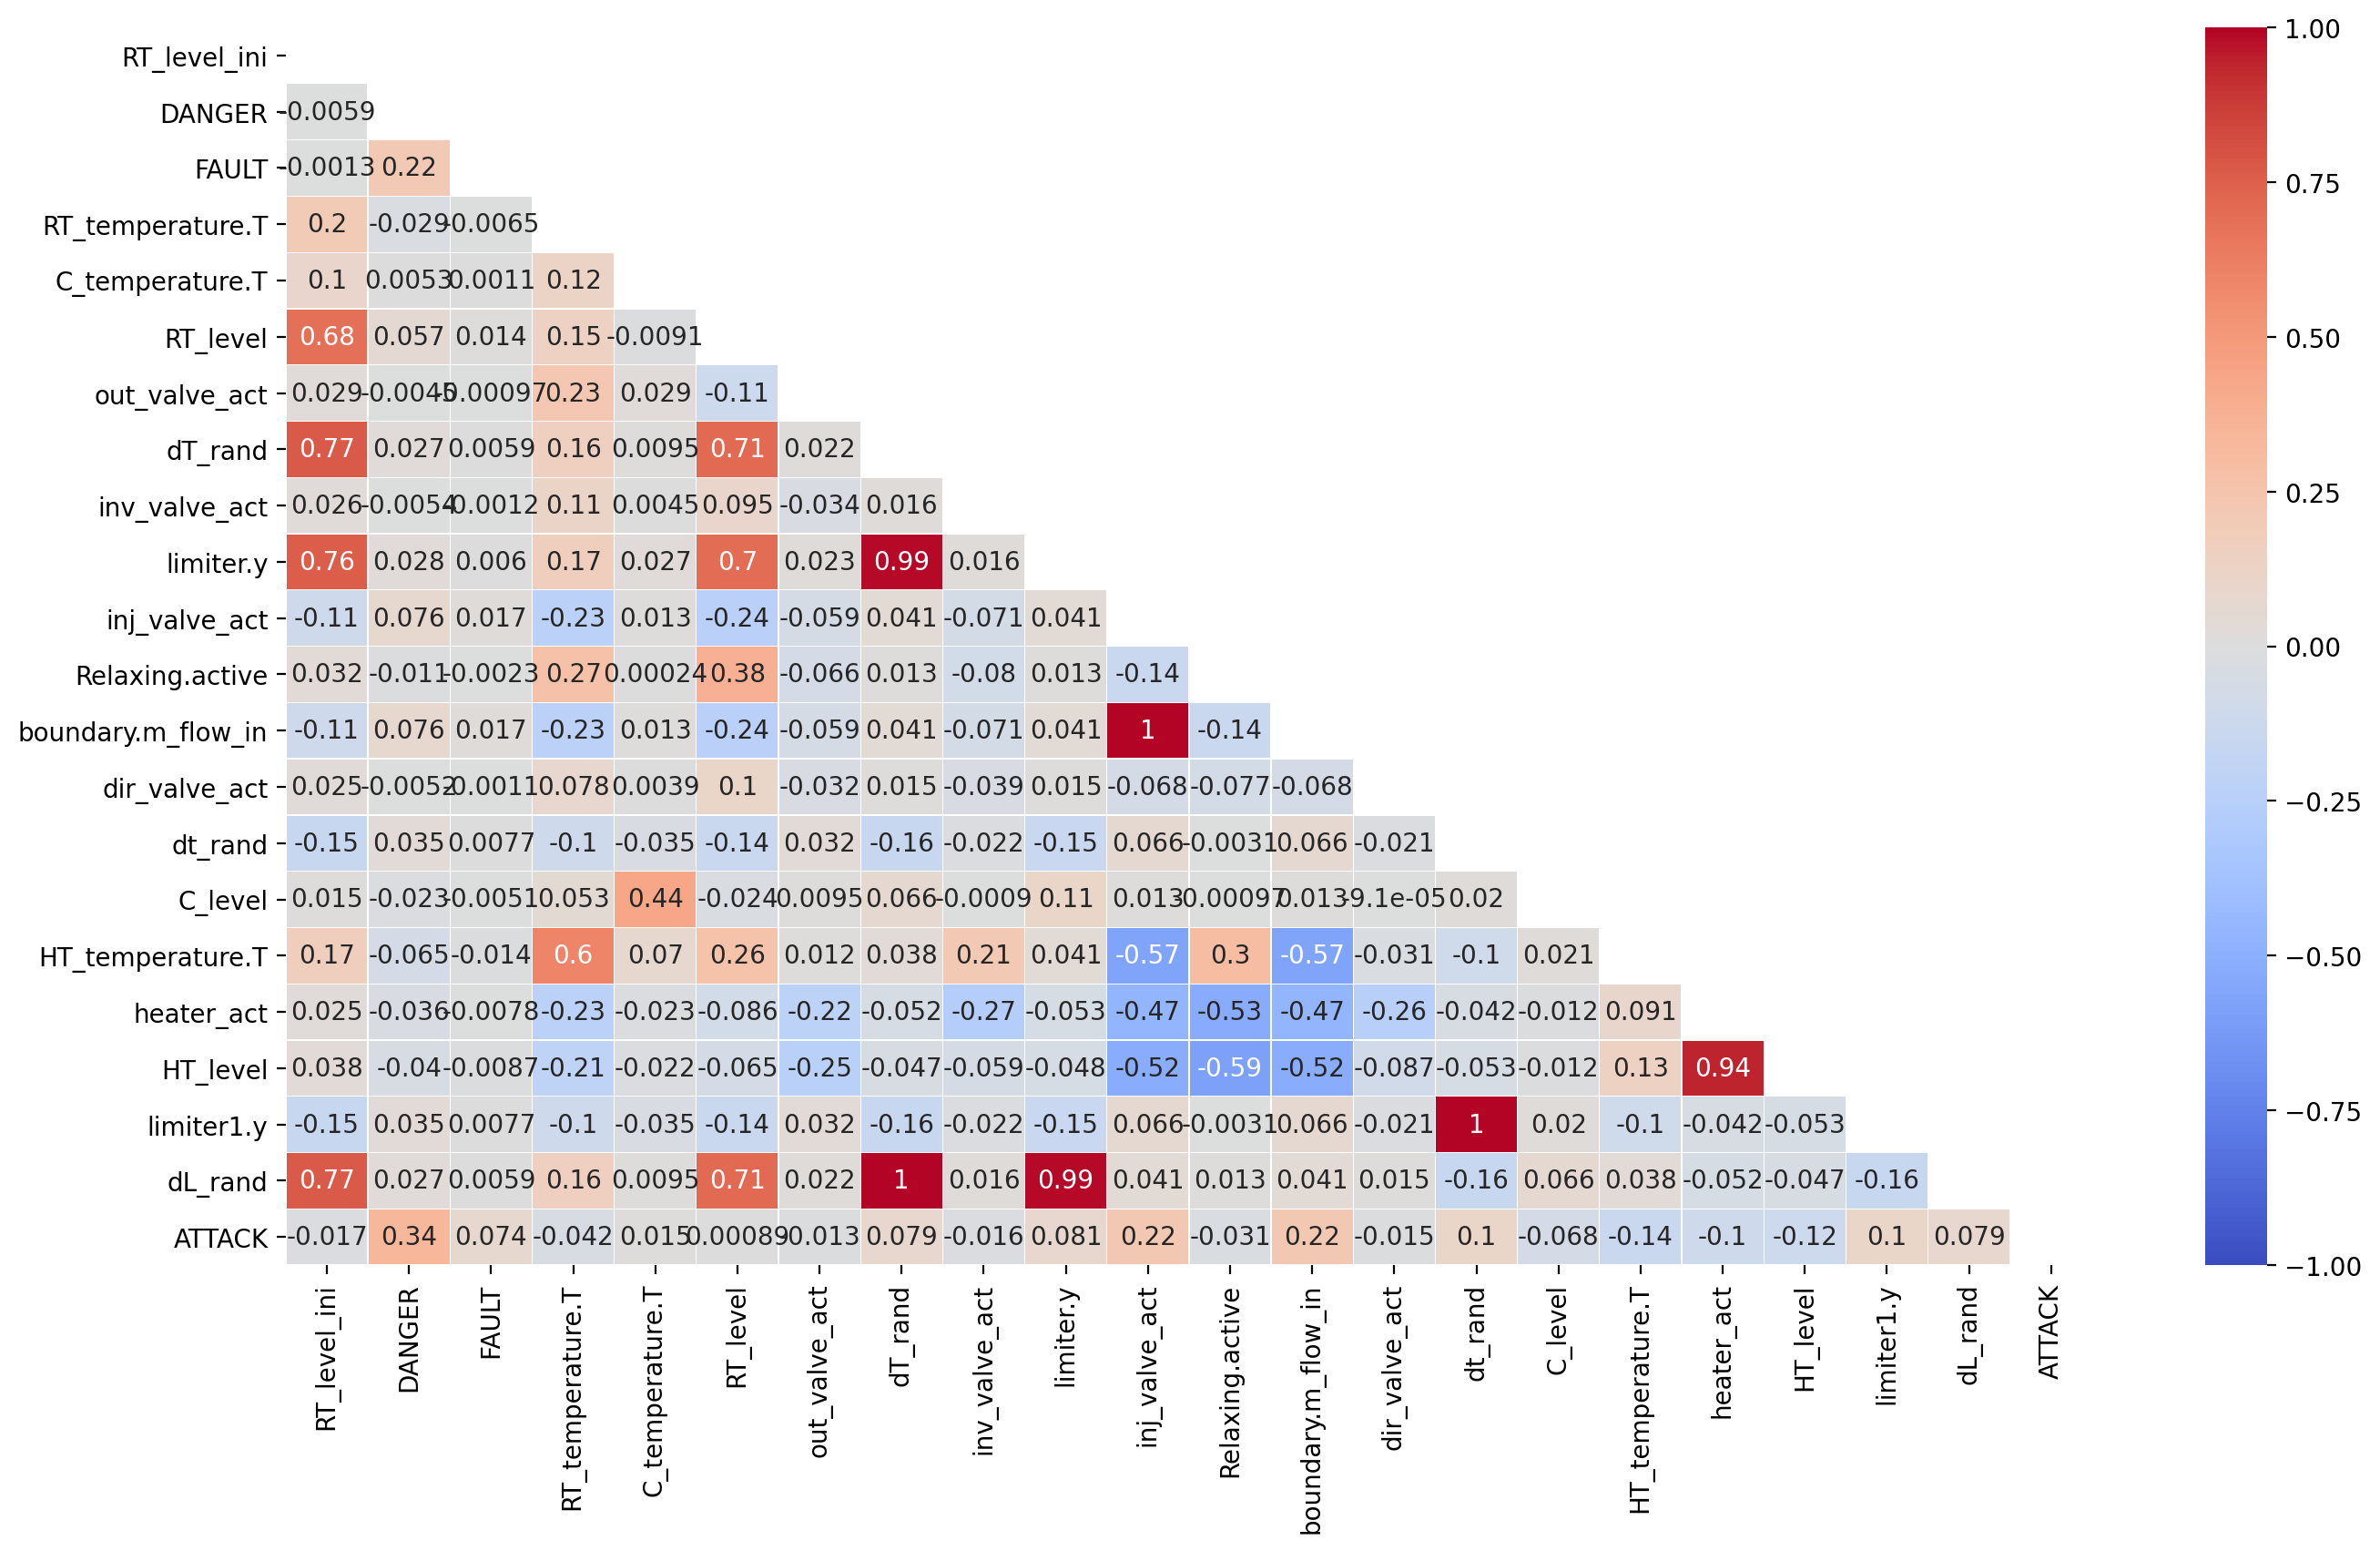

In [12]:
plt.figure(figsize=(16, 9), dpi = 200)
corr_plot = data_with_attacks.drop(['Time'], axis = 1).corr()
mask = np.zeros_like(corr_plot, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_plot,
            square=False, 
            linewidth=.1,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True,
            mask = mask)
plt.show()

In [13]:
corr_plot['ATTACK'].sort_values()

HT_temperature.T     -0.139962
HT_level             -0.116270
heater_act           -0.104288
C_level              -0.067816
RT_temperature.T     -0.042329
Relaxing.active      -0.031208
RT_level_ini         -0.017084
inv_valve_act        -0.015844
dir_valve_act        -0.015131
out_valve_act        -0.013059
RT_level              0.000894
C_temperature.T       0.015372
FAULT                 0.074486
dT_rand               0.079430
dL_rand               0.079430
limiter.y             0.080996
dt_rand               0.103034
limiter1.y            0.103034
boundary.m_flow_in    0.223108
inj_valve_act         0.223108
DANGER                0.342613
ATTACK                1.000000
Name: ATTACK, dtype: float64